# Heart Disease Dataset 

Alvee Hoque 

Data from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease) 

Originally used this dataset in Winter 2020 as a class project for machine learning class. Revisiting project to try other methods on the Cleveland dataset. 


In [89]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [90]:
# pandas style
pd.set_option('display.max_columns',100)

# seaborn style
sns.set(rc={'figure.figsize':(24,12)})
sns.set_style('darkgrid')
sns.set_palette('bright')

In [91]:
cleve_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
# switz_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
# va_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'
# hung_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'

### Features: 

All features are numbers and therefore should be float/int.

1. Age 
2. Sex 
        0: female
        1: male
3. CP - Chest Pain type
        1: typical angina
        2: atypical angina 
        3: non anginal pain
        4: asymptomatic
4. TrestBPS - resting blood pressure (in mm Hg on admission to the hospital)
5. Chol - serum cholestoral in mg/dl
6. FBS - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. RestECG = resting electrocardiographic results
        0: normal
        1: having ST-T wave abnormality 
        2: showing probable or definite left ventricular hypertrophy 
8. Thalach - maximum heart rate achieved
9. Exang - exercise induced angina (1 = yes; 0 = no)
10. Oldpeak - ST depression induced by exercise relative to rest
11. Slope - the slope of the peak exercise ST segment
        1: upsloping 
        2: flat
        3: downsloping
12. CA - number of major vessels (0-3) colored by flourosopy
13. Thal - thalassemia 
        3 = normal 
        6 = fixed defect 
        7 = reversable defect
14. Target = diagnosis of heart disease (angiographic disease status)
        0:   Absence of heart disease
        1-4: Presence of heart disease
        

In [92]:
features = ['age','sex','cp','trestbps','chol','fbs','restecg',
            'thalach','exang','oldpeak','slope','ca','thal','target']

In [93]:
df_cl = pd.read_csv(cleve_url,names=features,na_values='?')
# df_sw = pd.read_csv(switz_url,names=features,na_values='?')
# df_va = pd.read_csv(va_url,names=features,na_values='?')
# df_hu = pd.read_csv(hung_url,names=features,na_values='?')

In [94]:
# change target to strictly 0 and 1 
target = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}

df_cl['target'] = df_cl.target.map(target)
# df_sw['target'] = df_sw.target.map(target)
# df_va['target'] = df_va.target.map(target)
# df_hu['target'] = df_hu.target.map(target)

In [95]:
# all_data = pd.concat([df_cl,df_sw,df_va,df_hu],axis=0,ignore_index=True)

### Exploratory Data - Cleveland

Rest of the datasets have substantial missing data so we will get an idea from the Cleveland set

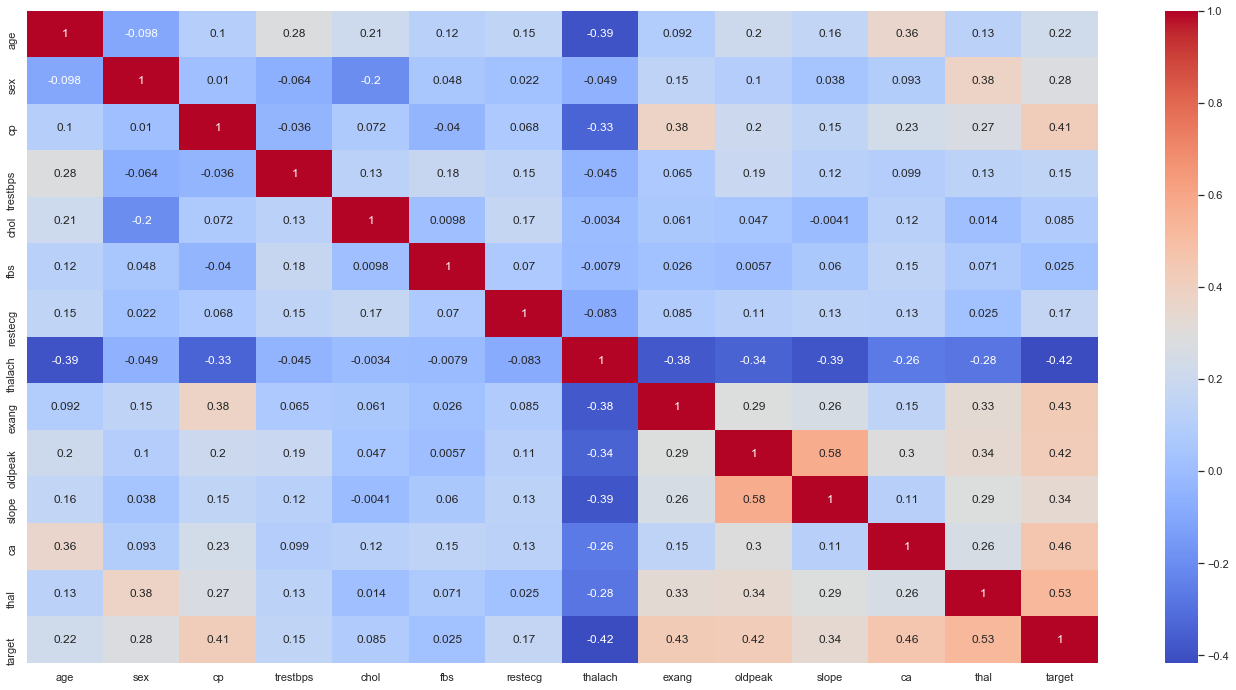

In [96]:
sns.heatmap(df_cl.corr(),annot=True,cmap='coolwarm')

Would have assumed correlation between age and cholesterol would have been higher. This is a problem with small data size. It will probably be inconclusive to get any meaningful results. 

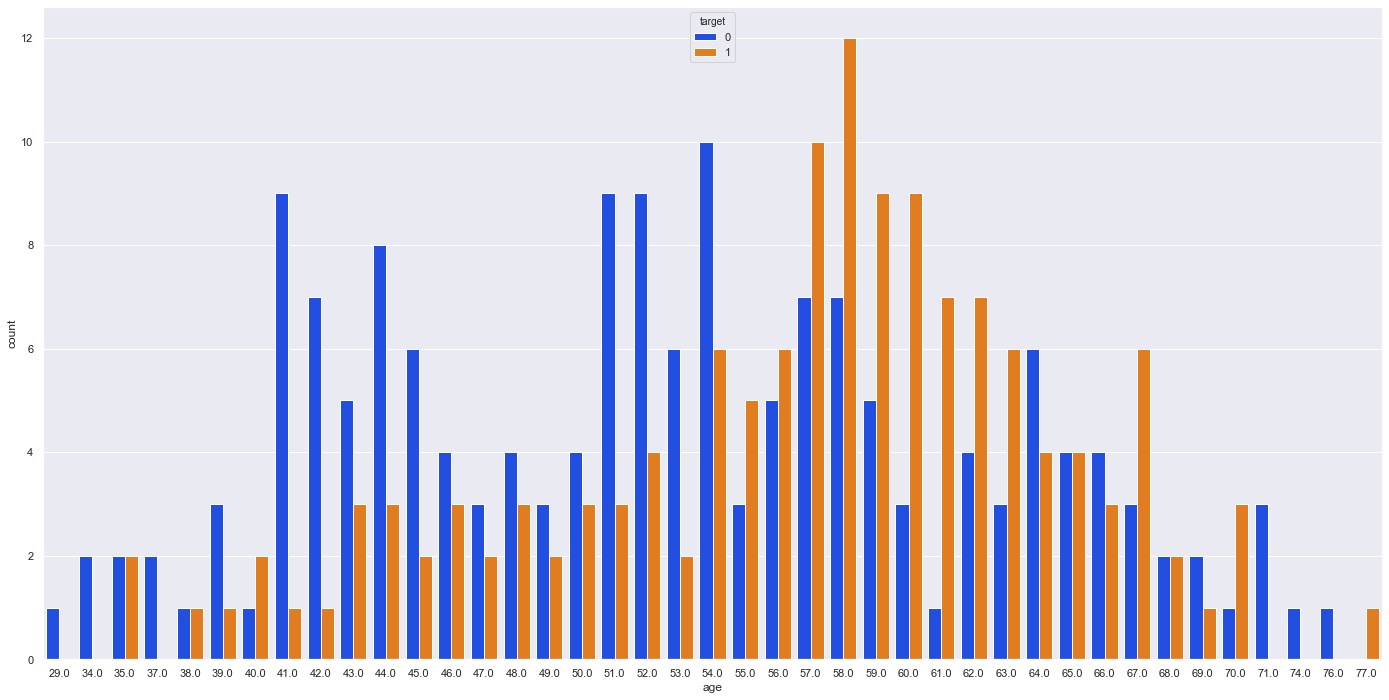

In [97]:
# Age vs Heart Disease
sns.countplot(data = df_cl, x ='age', hue='target')

Chart shows age is a factor. Older individuals have more counts of heart disease. 

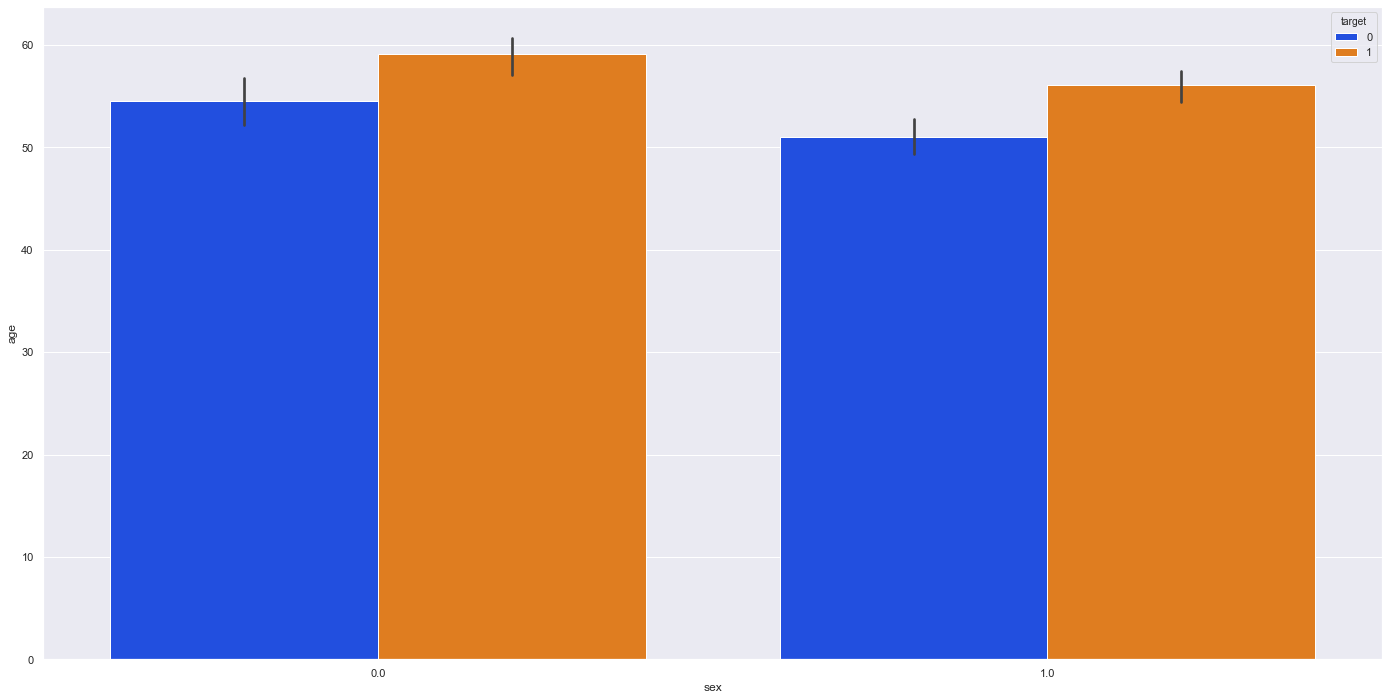

In [98]:
# Sex and Age vs Target
sns.barplot(x='sex',y='age',hue='target', data=df_cl)

Minor difference here as females that suffer from heart disease are slightly older than males. 

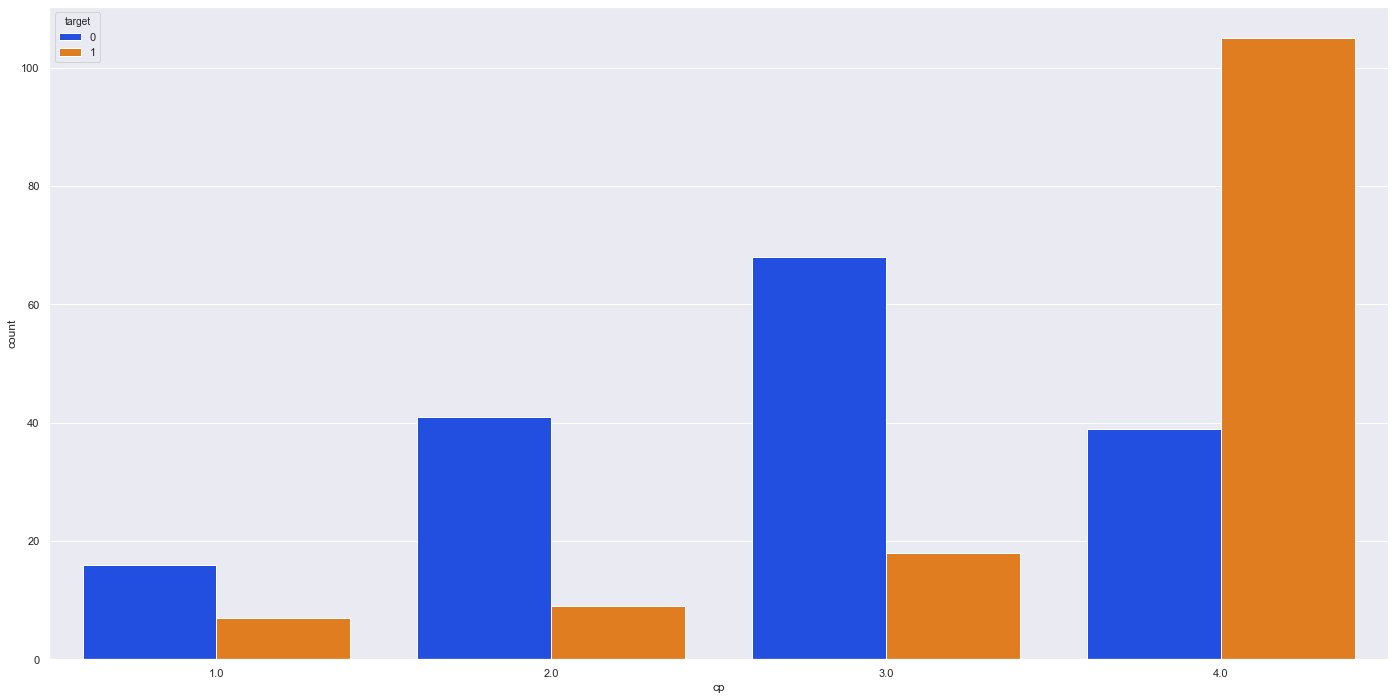

In [11]:
# CP vs Target  
sns.countplot(data = df_cl, x='cp', hue='target')

Asymptomatic has most counts of heart disease. Most likely not a major factor 

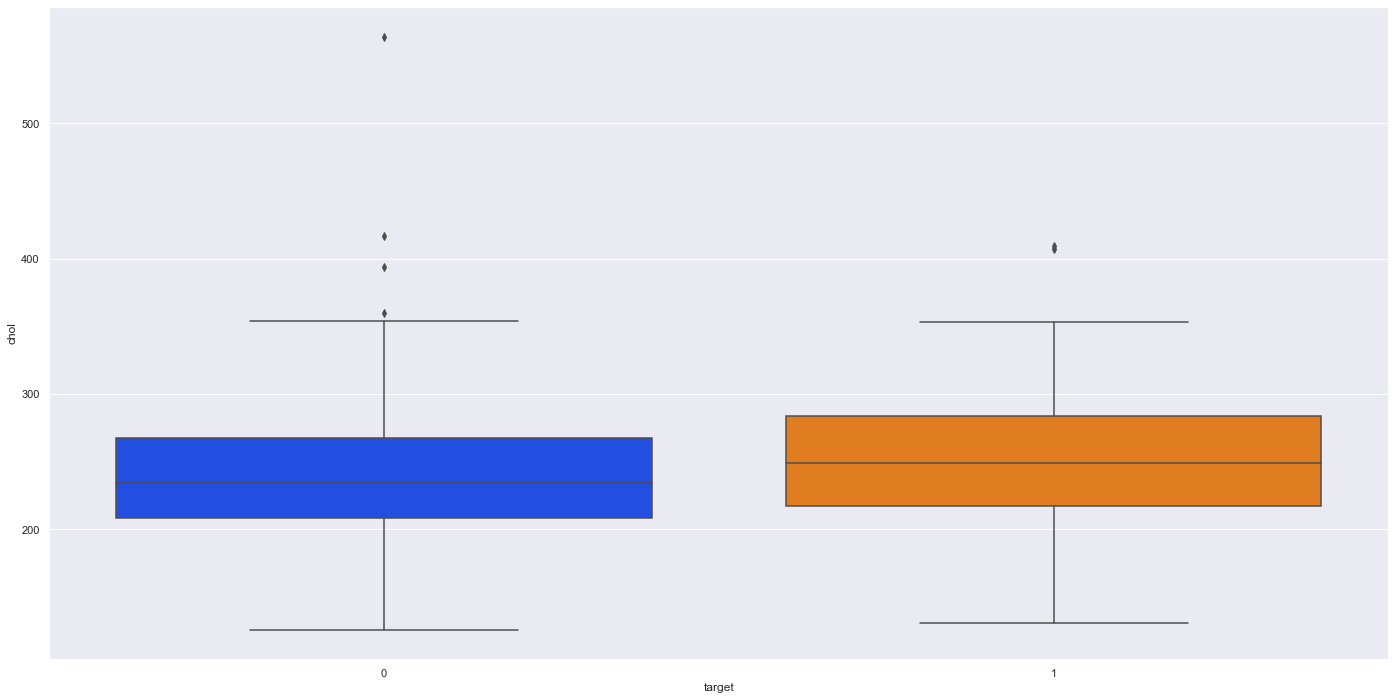

In [12]:
# Chol vs Target 
sns.boxplot(data = df_cl, x='target', y ='chol')

Median cholesterol value is higher in target. However outliers in the non disease. 

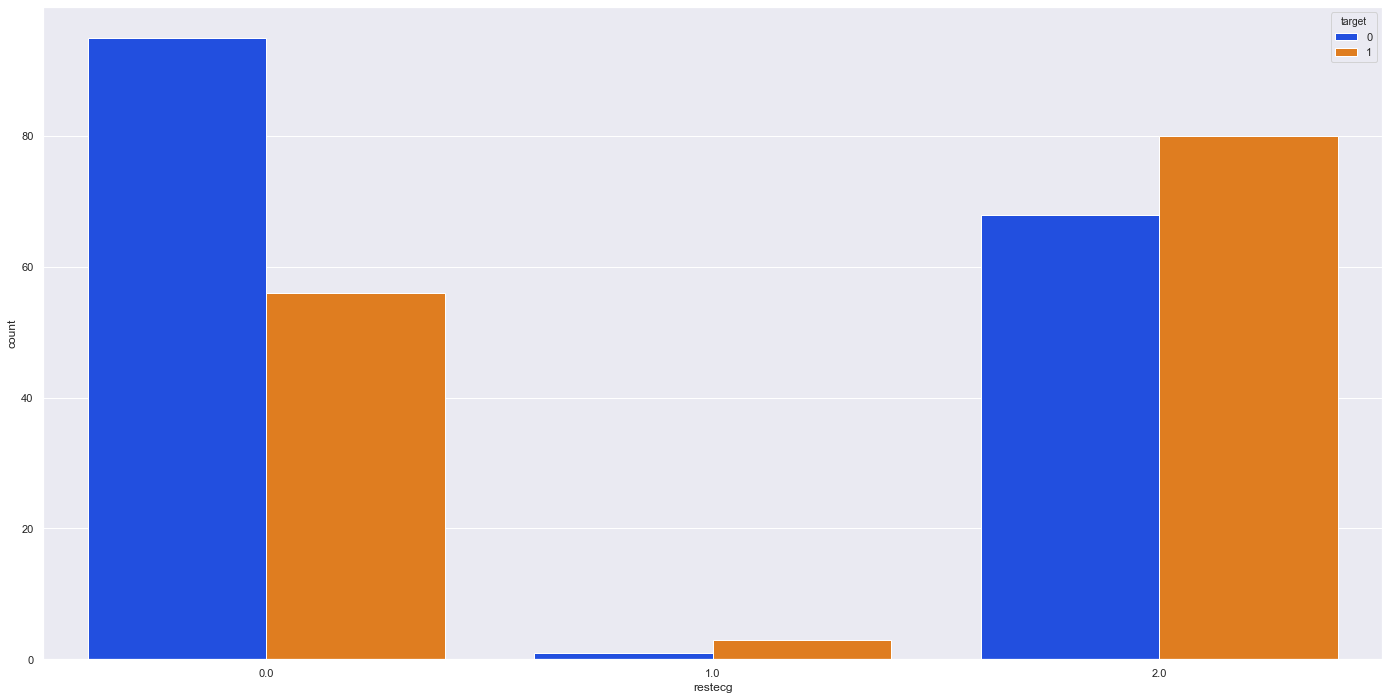

In [13]:
sns.countplot(data = df_cl, x='restecg',hue = 'target')

More individuals with heart disease that have left ventricular hypertrophy


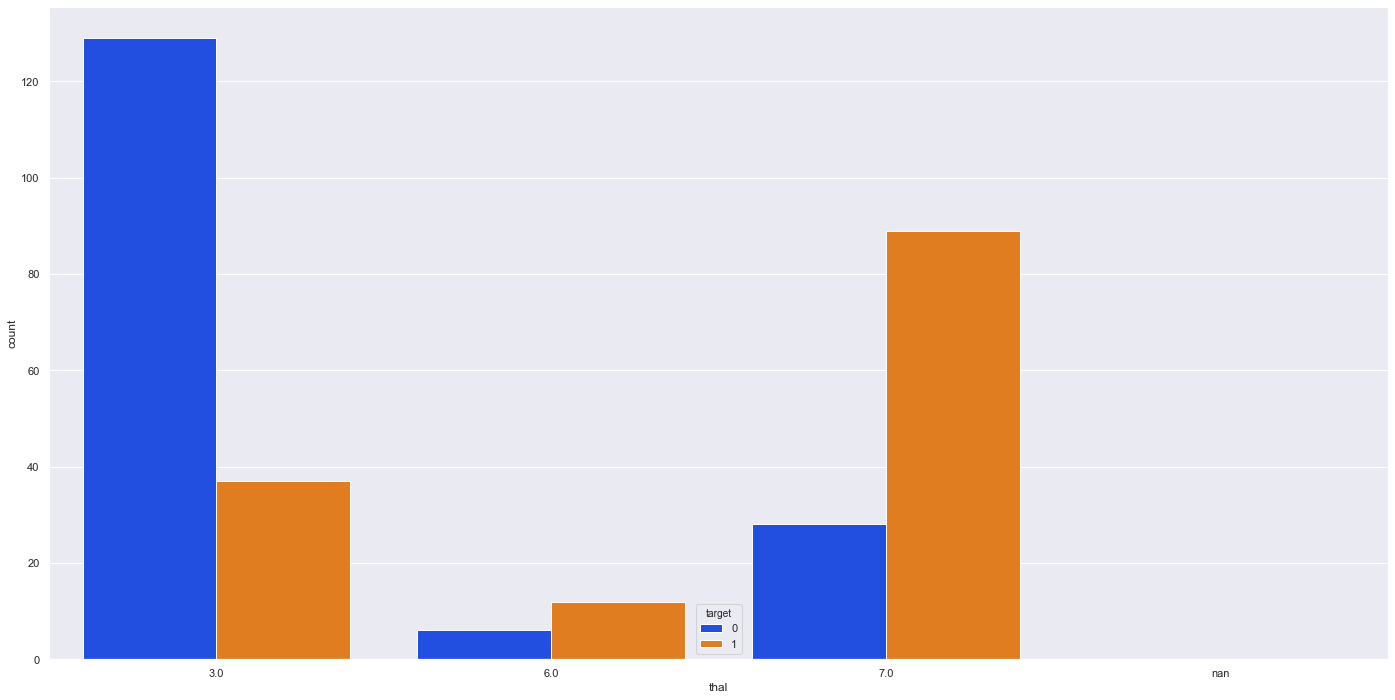

In [14]:
# Thal vs Target 
sns.countplot(data=df_cl,x='thal',hue='target',order=df_cl.thal.sort_values().unique())

3 is normal and shows most amount of no heart disease

In [15]:
# Confirming Age Trend in All Data
# sns.countplot(data = all_data, x ='age', hue='target')

#### Missing Values 

In [16]:
df_cl.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [17]:
# Fill missing with mode
df_cl['ca'] = df_cl.ca.fillna(df_cl.ca.mode()[0])
df_cl['thal'] = df_cl.thal.fillna(df_cl.thal.mode()[0])

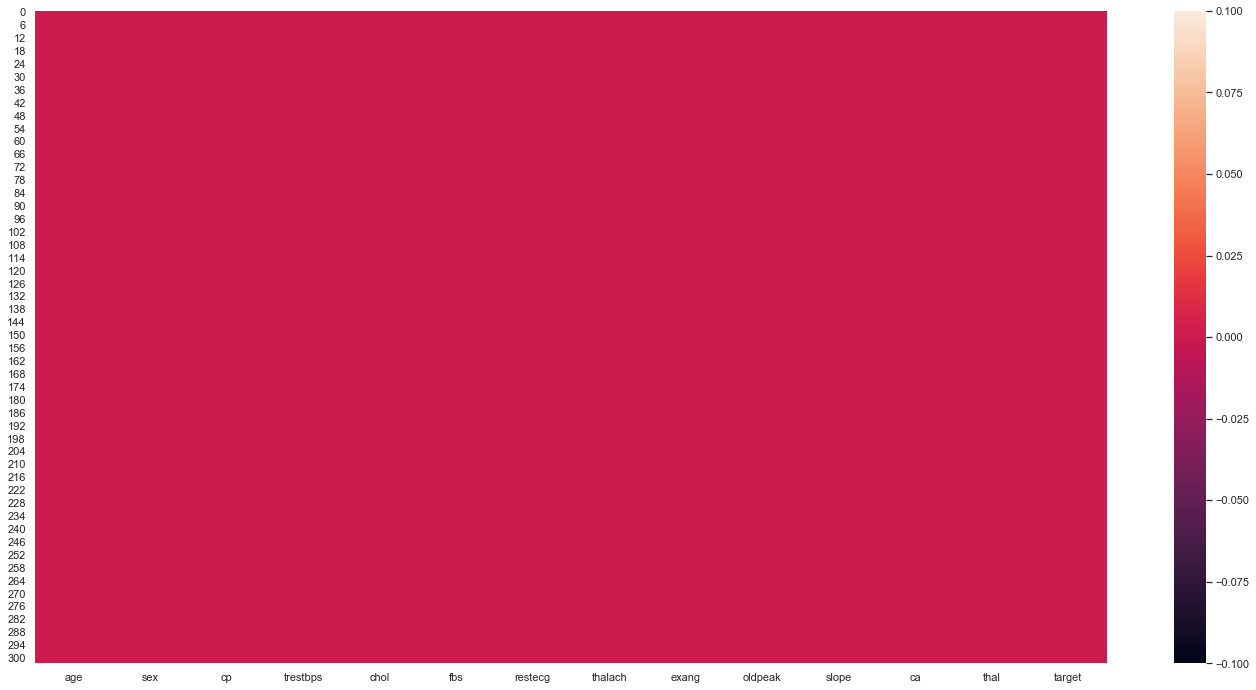

In [18]:
# Double Check for Missing Values
sns.heatmap(df_cl.isnull())

#### PreProcessing 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# Ensuring that categorical variables are objects
cat_vars = ['sex','cp','fbs', 'restecg', 'exang', 'slope', 'thal']
df_cl[cat_vars]=df_cl[cat_vars].astype('object')

In [21]:
df_cl = pd.get_dummies(df_cl)
df_cl.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_0.0,fbs_1.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0
1,67.0,160.0,286.0,108.0,1.5,3.0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0
2,67.0,120.0,229.0,129.0,2.6,2.0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0.0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0.0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0


In [22]:
X = df_cl.drop('target',axis=1)
y = df_cl['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [52]:
# Scale Data using Standard Scaler. Fit_transform the train data. DO NOT FIT TEST DATA 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Models

1. SVM
2. Random Forest
3. Neural Net 
4. XGBoost

In [53]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
#models 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [54]:
# instantiate models
svc = SVC()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
nn = MLPClassifier()
xgb = XGBClassifier()

In [55]:
# Simple eval models 
def model_eval(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))

In [56]:
print('SVM Eval Metrics:')
model_eval(svc)

SVM Eval Metrics:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.85      0.77      0.80        43

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [57]:
print('Random Forest Metrics: ')
model_eval(rfc)

Random Forest Metrics: 
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        48
           1       0.78      0.84      0.81        43

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [58]:
print('Neural Network Metrics: ')
model_eval(nn)

Neural Network Metrics: 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        48
           1       0.80      0.77      0.79        43

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



C:\Users\Alvee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [59]:
print('XGBoost Metrics: ')
model_eval(xgb)

XGBoost Metrics: 
[17:55:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.78      0.74      0.76        43

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



C:\Users\Alvee\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


#### Note
SVM seems to be the best choice in this scenario. Will tweak neural network below to get better results